In [2]:
#imports
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

# Set styling
plt.style.use('default')
sns.set_palette("husl")


### Step 1: Load and Preprocess the UK-DALE Dataset

#### 1.1 Load the Data

In [19]:
# Define the path to the raw data folder
data_path = r"C:\Users\risha\OneDrive\Desktop\Projects\PORTF_1_Energy Demand Forecasting\energy-forecasting-project\data\raw\house_1"

# Load mains data (aggregate consumption)
mains_data = pd.read_csv(os.path.join(data_path, "mains.dat"), header=None, sep=" ")
mains_data.columns = ["timestamp", "power_phase1", "power_phase2", "power_phase3"]
mains_data["timestamp"] = pd.to_datetime(mains_data["timestamp"], unit="s")
mains_data.set_index("timestamp", inplace=True)

# Load appliance data (e.g., channel_1.dat, channel_2.dat, etc.)
appliance_files = []
for i in range(1,11):
    channel_name = f"channel_{i}.dat"
    appliance_files.append(channel_name) 
    
appliance_data = {}

for file in appliance_files:
    # Load the data
    data = pd.read_csv(os.path.join(data_path, file), header=None, sep=" ")
    data.columns = ["timestamp", "power"]
    data["timestamp"] = pd.to_datetime(data["timestamp"], unit="s")
    data.set_index("timestamp", inplace=True)
    
    # Store in dictionary
    appliance_data[file] = data

# Preview the data
print("Mains Data:")
print(mains_data.head())

print("\nAppliance Data:")
for file, data in appliance_data.items():
    print(f"\n{file}:")
    print(data.head())

Mains Data:
                               power_phase1  power_phase2  power_phase3
timestamp                                                              
2013-03-17 19:12:43.099999905        337.88        431.04        240.15
2013-03-17 19:12:44.099999905        339.43        427.94        240.56
2013-03-17 19:12:45.099999905        340.63        429.66        241.07
2013-03-17 19:12:46.099999905        338.80        426.99        240.44
2013-03-17 19:12:47.099999905        340.88        429.13        241.01

Appliance Data:

channel_1.dat:
                     power
timestamp                 
2012-11-09 22:28:15    599
2012-11-09 22:28:21    582
2012-11-09 22:28:27    600
2012-11-09 22:28:33    586
2012-11-09 22:28:40    596

channel_2.dat:
                     power
timestamp                 
2012-11-09 22:28:23     62
2012-11-09 22:28:35     62
2012-11-09 22:28:47     57
2012-11-09 22:29:17     57
2012-11-09 22:29:29     57

channel_3.dat:
                     power
timestamp     

#### 1.2 Handle Missing Data

In [20]:
# Check for missing values in mains data
print("Missing values in mains data:")
print(mains_data.isnull().sum())

# Check length of mains data before handling missing values
print("\nLength of mains data before handling missing values:", len(mains_data))

# Check for missing values in appliance data
for file, data in appliance_data.items():
    print(f"\nMissing values in {file}:")
    print(data.isnull().sum())
    
    # Check length of appliance data before handling missing values
    print(f"Length of {file} before handling missing values:", len(data))

# Handle missing values (e.g., forward fill)
mains_data.fillna(method="ffill", inplace=True)
for file, data in appliance_data.items():
    appliance_data[file].fillna(method="ffill", inplace=True)

# Check length of mains data after handling missing values
print("\nLength of mains data after handling missing values:", len(mains_data))

# Check length of appliance data after handling missing values
for file, data in appliance_data.items():
    print(f"Length of {file} after handling missing values:", len(data))

Missing values in mains data:
power_phase1    0
power_phase2    0
power_phase3    0
dtype: int64

Length of mains data before handling missing values: 56687468

Missing values in channel_1.dat:
power    0
dtype: int64
Length of channel_1.dat before handling missing values: 10239433

Missing values in channel_2.dat:
power    0
dtype: int64
Length of channel_2.dat before handling missing values: 10066552

Missing values in channel_3.dat:
power    0
dtype: int64
Length of channel_3.dat before handling missing values: 10066448

Missing values in channel_4.dat:
power    0
dtype: int64
Length of channel_4.dat before handling missing values: 2557435

Missing values in channel_5.dat:
power    0
dtype: int64
Length of channel_5.dat before handling missing values: 9194001

Missing values in channel_6.dat:
power    0
dtype: int64
Length of channel_6.dat before handling missing values: 9315898

Missing values in channel_7.dat:
power    0
dtype: int64
Length of channel_7.dat before handling missing

#### 1.3 Resample Data

In [21]:
# Resample mains data to 1-minute frequency
mains_resampled = mains_data.resample("1T").mean()

# Resample appliance data to 1-minute frequency
appliance_resampled = {}
for file, data in appliance_data.items():
    appliance_resampled[file] = data.resample("1T").mean()

# Preview resampled data
print("Resampled Mains Data:")
print(mains_resampled.head())

print("\nResampled Appliance Data:")
for file, data in appliance_resampled.items():
    print(f"\n{file}:")
    print(data.head())

Resampled Mains Data:
                     power_phase1  power_phase2  power_phase3
timestamp                                                    
2013-03-17 19:12:00    339.430588    427.967059    240.768824
2013-03-17 19:13:00    339.269333    427.926000    240.675667
2013-03-17 19:14:00    339.977000    429.644167    241.111167
2013-03-17 19:15:00    340.361356    429.187119    240.815593
2013-03-17 19:16:00    340.720833    429.385500    240.939167

Resampled Appliance Data:

channel_1.dat:
                          power
timestamp                      
2012-11-09 22:28:00  591.571429
2012-11-09 22:29:00  582.142857
2012-11-09 22:30:00  586.750000
2012-11-09 22:31:00  590.333333
2012-11-09 22:32:00  587.100000

channel_2.dat:
                         power
timestamp                     
2012-11-09 22:28:00  60.333333
2012-11-09 22:29:00  57.000000
2012-11-09 22:30:00  57.000000
2012-11-09 22:31:00  57.000000
2012-11-09 22:32:00  56.500000

channel_3.dat:
                     power
t

### Step 2: Understand Metadata and Appliance Context

#### 2.1 Label Appliances

In [22]:
# Load the labels.dat file
labels_path = os.path.join(data_path, "labels.dat")
labels = pd.read_csv(labels_path, header=None, sep=" ")
labels.columns = ["channel", "appliance"]

# Convert channel numbers to filenames (e.g., channel_1.dat)
labels["filename"] = "channel_" + labels["channel"].astype(str) + ".dat"

# Preview the labels
print("Appliance Labels:")
print(labels)

Appliance Labels:
    channel             appliance        filename
0         1             aggregate   channel_1.dat
1         2                boiler   channel_2.dat
2         3    solar_thermal_pump   channel_3.dat
3         4                laptop   channel_4.dat
4         5       washing_machine   channel_5.dat
5         6            dishwasher   channel_6.dat
6         7                    tv   channel_7.dat
7         8        kitchen_lights   channel_8.dat
8         9                  htpc   channel_9.dat
9        10                kettle  channel_10.dat
10       11               toaster  channel_11.dat
11       12                fridge  channel_12.dat
12       13             microwave  channel_13.dat
13       14            lcd_office  channel_14.dat
14       15           hifi_office  channel_15.dat
15       16            breadmaker  channel_16.dat
16       17        amp_livingroom  channel_17.dat
17       18           adsl_router  channel_18.dat
18       19     livingroom_s_lam

#### 2.2 Label the Appliance Data

In [23]:
# Label the appliance data
appliance_resampled_labeled = {}

for file, data in appliance_resampled.items():
    # Get the appliance name from the labels
    appliance_name = labels[labels["filename"] == file]["appliance"].values[0]
    
    # Add the appliance name as a column
    data["appliance"] = appliance_name
    
    # Store in the labeled dictionary
    appliance_resampled_labeled[file] = data

# Preview labeled data
for file, data in appliance_resampled_labeled.items():
    print(f"\n{file} ({data['appliance'].iloc[0]}):")
    print(data.head())


channel_1.dat (aggregate):
                          power  appliance
timestamp                                 
2012-11-09 22:28:00  591.571429  aggregate
2012-11-09 22:29:00  582.142857  aggregate
2012-11-09 22:30:00  586.750000  aggregate
2012-11-09 22:31:00  590.333333  aggregate
2012-11-09 22:32:00  587.100000  aggregate

channel_2.dat (boiler):
                         power appliance
timestamp                               
2012-11-09 22:28:00  60.333333    boiler
2012-11-09 22:29:00  57.000000    boiler
2012-11-09 22:30:00  57.000000    boiler
2012-11-09 22:31:00  57.000000    boiler
2012-11-09 22:32:00  56.500000    boiler

channel_3.dat (solar_thermal_pump):
                     power           appliance
timestamp                                     
2012-11-09 22:28:00    0.0  solar_thermal_pump
2012-11-09 22:29:00    0.0  solar_thermal_pump
2012-11-09 22:30:00    0.0  solar_thermal_pump
2012-11-09 22:31:00    0.0  solar_thermal_pump
2012-11-09 22:32:00    0.0  solar_therma

### Step 3: Analyze Appliance Patterns

Analyzing appliance patterns helps to understand how each appliance consumes energy over time. This step is crucial for:

Identifying usage patterns (e.g., when appliances are most active).

Detecting anomalies or unexpected behavior.

Preparing the data for disaggregation and forecasting.

#### 3.1 Visualize Appliance Power Consumption

No data available for 2012-11-10 in channel_4.dat. Skipping...


<Figure size 1400x800 with 0 Axes>

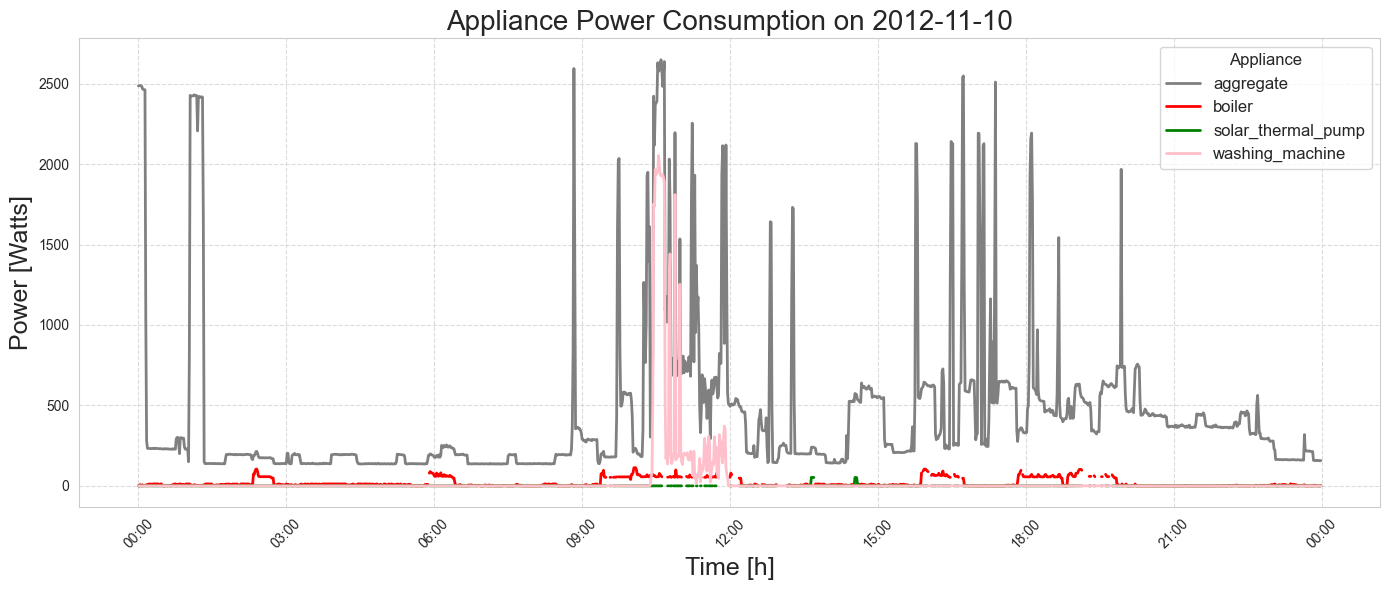

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a professional style
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Define a color palette for appliances
color_palette = {
    "aggregate": "grey",
    "boiler": "red",
    "solar_thermal_pump": "green",
    "laptop": "blue", 
    "washing_machine": "pink"
}

# Plot power consumption for selected appliances
selected_appliances = ["aggregate", "boiler", "solar_thermal_pump", "laptop", "washing_machine"]

# List of days to visualize (only one date)
days_to_visualize = ["2012-11-10"]  # Replace with the desired date

# Create subplots
fig, axes = plt.subplots(len(days_to_visualize), 1, figsize=(14, 6 * len(days_to_visualize)), sharex=True)

for i, day in enumerate(days_to_visualize):
    for file, data in appliance_resampled_labeled.items():
        if data["appliance"].iloc[0] in selected_appliances:
            # Filter data for the selected day
            try:
                daily_data = data.loc[day]
            except KeyError:
                print(f"No data available for {day} in {file}. Skipping...")
                continue
            
            # Plot the data
            axes.plot(daily_data.index, daily_data["power"], 
                      label=data["appliance"].iloc[0], 
                      color=color_palette[data["appliance"].iloc[0]], 
                      linewidth=2)
            
            # Add title and labels
            axes.set_title(f"Appliance Power Consumption on {day}", fontsize=20)
            axes.set_ylabel("Power [Watts]", fontsize=18)
            
            # Add gridlines
            axes.grid(True, linestyle="--", alpha=0.7)
            
            # Format x-axis to show hours
            axes.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%H:%M"))
            
            # Rotate x-axis labels for better readability
            plt.setp(axes.xaxis.get_majorticklabels(), rotation=45)

# Add a common x-axis label
axes.set_xlabel("Time [h]", fontsize=18)

# Add a legend
axes.legend(title="Appliance", title_fontsize=12, fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

No data available for 2012-11-10 in channel_4.dat. Skipping...


<Figure size 1600x1000 with 0 Axes>

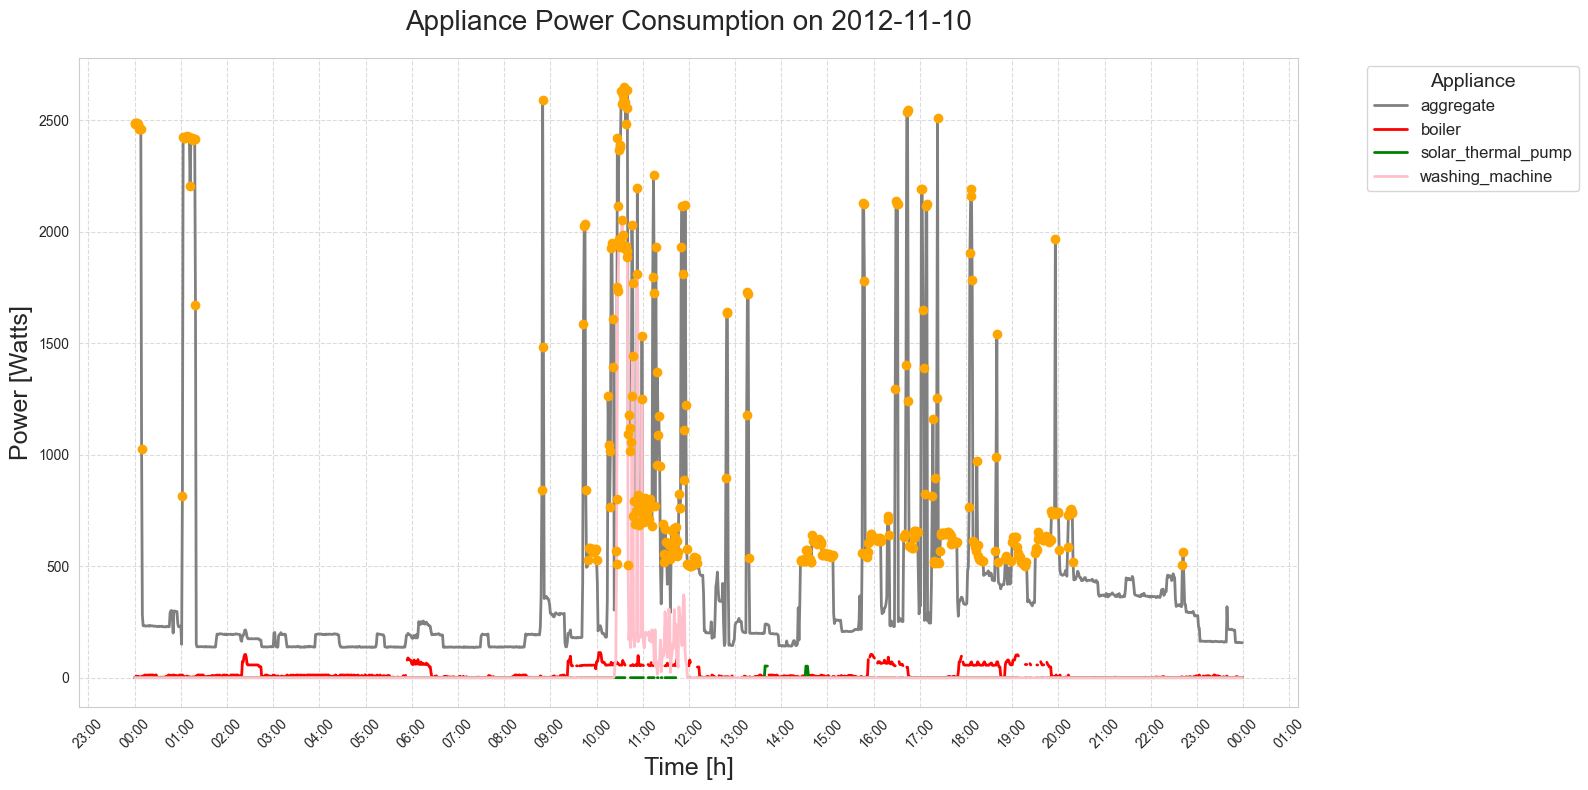

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Set a professional style
sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))

# Define a color palette for appliances
color_palette = {
    "aggregate": "grey",
    "boiler": "red",
    "solar_thermal_pump": "green",
    "laptop": "blue", 
    "washing_machine": "pink"
}

# Plot power consumption for selected appliances
selected_appliances = ["aggregate", "boiler", "solar_thermal_pump", "laptop", "washing_machine"]

# List of days to visualize (only one date)
days_to_visualize = ["2012-11-10"]  # Replace with the desired date

# Create subplots
fig, axes = plt.subplots(len(days_to_visualize), 1, figsize=(16, 8 * len(days_to_visualize)), sharex=True)

for i, day in enumerate(days_to_visualize):
    for file, data in appliance_resampled_labeled.items():
        if data["appliance"].iloc[0] in selected_appliances:
            # Filter data for the selected day
            try:
                daily_data = data.loc[day]
            except KeyError:
                print(f"No data available for {day} in {file}. Skipping...")
                continue
            
            # Plot the data
            axes.plot(daily_data.index, daily_data["power"], 
                      label=data["appliance"].iloc[0], 
                      color=color_palette[data["appliance"].iloc[0]], 
                      linewidth=2)
            
            # Highlight peak usage (example: highlight values above a threshold)
            threshold = 500  # Adjust this threshold as needed
            peak_times = daily_data[daily_data["power"] > threshold].index
            axes.scatter(peak_times, daily_data.loc[peak_times, "power"], 
                         color="orange", zorder=5, label="Peak Usage" if file == selected_appliances[0] else "")
            
            # Add title and labels
            axes.set_title(f"Appliance Power Consumption on {day}", fontsize=20, pad=20)
            axes.set_ylabel("Power [Watts]", fontsize=18)
            
            # Add gridlines
            axes.grid(True, linestyle="--", alpha=0.7)
            
            # Format x-axis to show hours
            axes.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
            axes.xaxis.set_major_locator(mdates.HourLocator(interval=1))
            
            # Rotate x-axis labels for better readability
            plt.setp(axes.xaxis.get_majorticklabels(), rotation=45)

# Add a common x-axis label
axes.set_xlabel("Time [h]", fontsize=18)

# Add a legend
handles, labels = axes.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))  # Remove duplicate labels
axes.legend(unique_labels.values(), unique_labels.keys(), 
            title="Appliance", title_fontsize=14, fontsize=12, 
            bbox_to_anchor=(1.05, 1), loc="upper left")

# Adjust layout
plt.tight_layout()
plt.show()

#### Daily Appliance Usage Patterns (Histograms)

In [24]:
# Calculate total energy consumption for each appliance
total_energy = {}
for file, data in appliance_resampled_labeled.items():
    appliance_name = data["appliance"].iloc[0]
    total_energy[appliance_name] = data["power"].sum()

# Convert the total energy dictionary to a DataFrame for easier manipulation
total_energy_df = pd.DataFrame(list(total_energy.items()), columns=["Appliance", "Total Energy"])

# Sort the DataFrame by total energy in descending order
total_energy_df = total_energy_df.sort_values(by="Total Energy", ascending=False)

# Get the top 5 appliances
top_5_appliances = total_energy_df.head(10)

# Print the top 5 appliances
print("Top 5 Appliances Contributing to Aggregate Power Consumption:")
print(top_5_appliances)

Top 5 Appliances Contributing to Aggregate Power Consumption:
            Appliance  Total Energy
0           aggregate  3.931948e+08
4     washing_machine  3.023371e+07
7      kitchen_lights  2.233996e+07
8                htpc  1.813788e+07
1              boiler  1.798838e+07
5          dishwasher  1.775324e+07
9              kettle  1.628177e+07
6                  tv  1.194874e+07
2  solar_thermal_pump  9.845790e+06
3              laptop  4.126431e+06


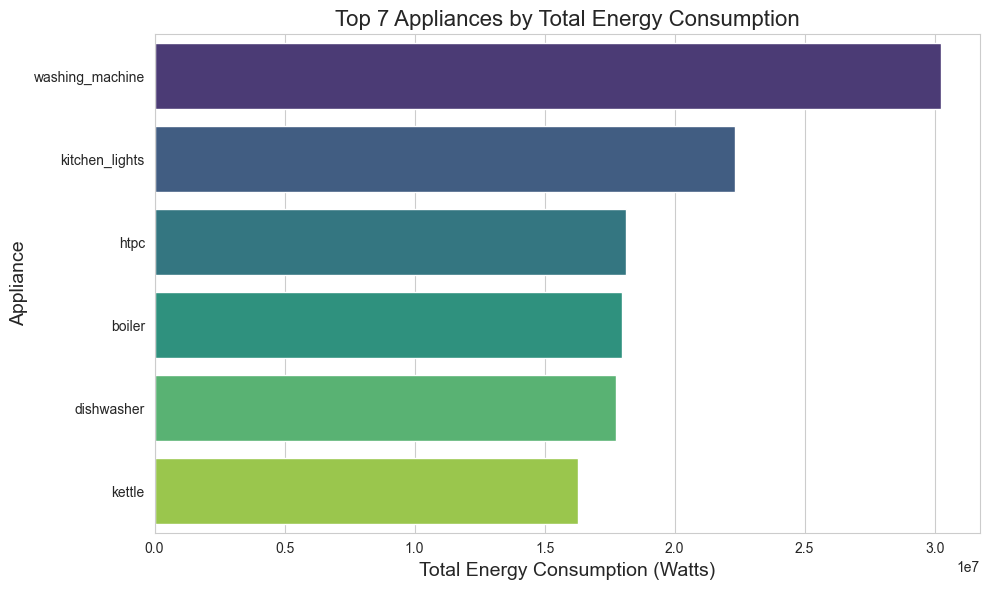

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the top 5 appliances from the total energy DataFrame
top_7_appliances = total_energy_df.head(7)

# Exclude "aggregate" if it's not relevant
top_7_appliances = top_7_appliances[top_7_appliances["Appliance"] != "aggregate"]

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Create a bar plot (histogram) for the top 7 appliances
sns.barplot(x="Total Energy", y="Appliance", data=top_7_appliances, palette="viridis")

# Add labels and title
plt.xlabel("Total Energy Consumption (Watts)", fontsize=14)
plt.ylabel("Appliance", fontsize=14)
plt.title("Top 7 Appliances by Total Energy Consumption", fontsize=16)

# Show plot
plt.tight_layout()
plt.show()

No data available for 2012-11-10 in channel_4.dat. Skipping...
No data available for 2012-11-10 in channel_9.dat. Skipping...


<Figure size 1400x800 with 0 Axes>

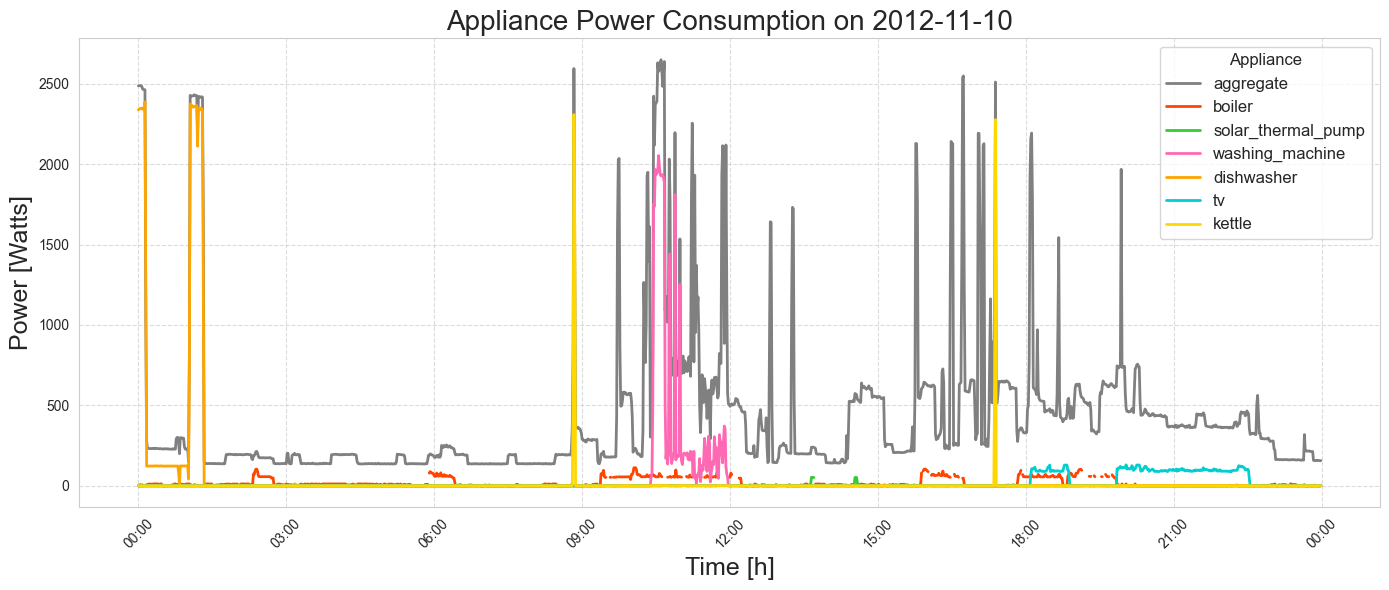

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a professional style
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Define a color palette for appliances
color_palette = {
    "aggregate": "#808080",  # Grey (neutral color for aggregate)
    "boiler": "#FF4500",     # Orange Red (warm color for heating-related appliance)
    "solar_thermal_pump": "#32CD32",  # Lime Green (eco-friendly, solar-related)
    "laptop": "#1E90FF",     # Dodger Blue (cool color for electronics)
    "washing_machine": "#FF69B4",  # Hot Pink (vibrant color for a common household appliance)
    "htpc": "#8A2BE2",       # Blue Violet (unique color for a media center)
    "dishwasher": "#FFA500", # Orange (bright and distinct)
    "kettle": "#FFD700",     # Gold (warm color for a kitchen appliance)
    "tv": "#00CED1",         # Dark Turquoise (cool color for entertainment devices)
}


# Plot power consumption for selected appliances
selected_appliances = ["aggregate", "boiler", "solar_thermal_pump", "laptop", "washing_machine", "htpc", "dishwasher", "kettle", "tv"]

# List of days to visualize (only one date)
days_to_visualize = ["2012-11-10"]  # Replace with the desired date

# Create subplots
fig, axes = plt.subplots(len(days_to_visualize), 1, figsize=(14, 6 * len(days_to_visualize)), sharex=True)

for i, day in enumerate(days_to_visualize):
    for file, data in appliance_resampled_labeled.items():
        if data["appliance"].iloc[0] in selected_appliances:
            # Filter data for the selected day
            try:
                daily_data = data.loc[day]
            except KeyError:
                print(f"No data available for {day} in {file}. Skipping...")
                continue
            
            # Plot the data
            axes.plot(daily_data.index, daily_data["power"], 
                      label=data["appliance"].iloc[0], 
                      color=color_palette[data["appliance"].iloc[0]], 
                      linewidth=2)
            
            # Add title and labels
            axes.set_title(f"Appliance Power Consumption on {day}", fontsize=20)
            axes.set_ylabel("Power [Watts]", fontsize=18)
            
            # Add gridlines
            axes.grid(True, linestyle="--", alpha=0.7)
            
            # Format x-axis to show hours
            axes.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%H:%M"))
            
            # Rotate x-axis labels for better readability
            plt.setp(axes.xaxis.get_majorticklabels(), rotation=45)

# Add a common x-axis label
axes.set_xlabel("Time [h]", fontsize=18)

# Add a legend
axes.legend(title="Appliance", title_fontsize=12, fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

No data available for 2012-11-10 in channel_4.dat. Skipping...
No data available for 2012-11-10 in channel_9.dat. Skipping...


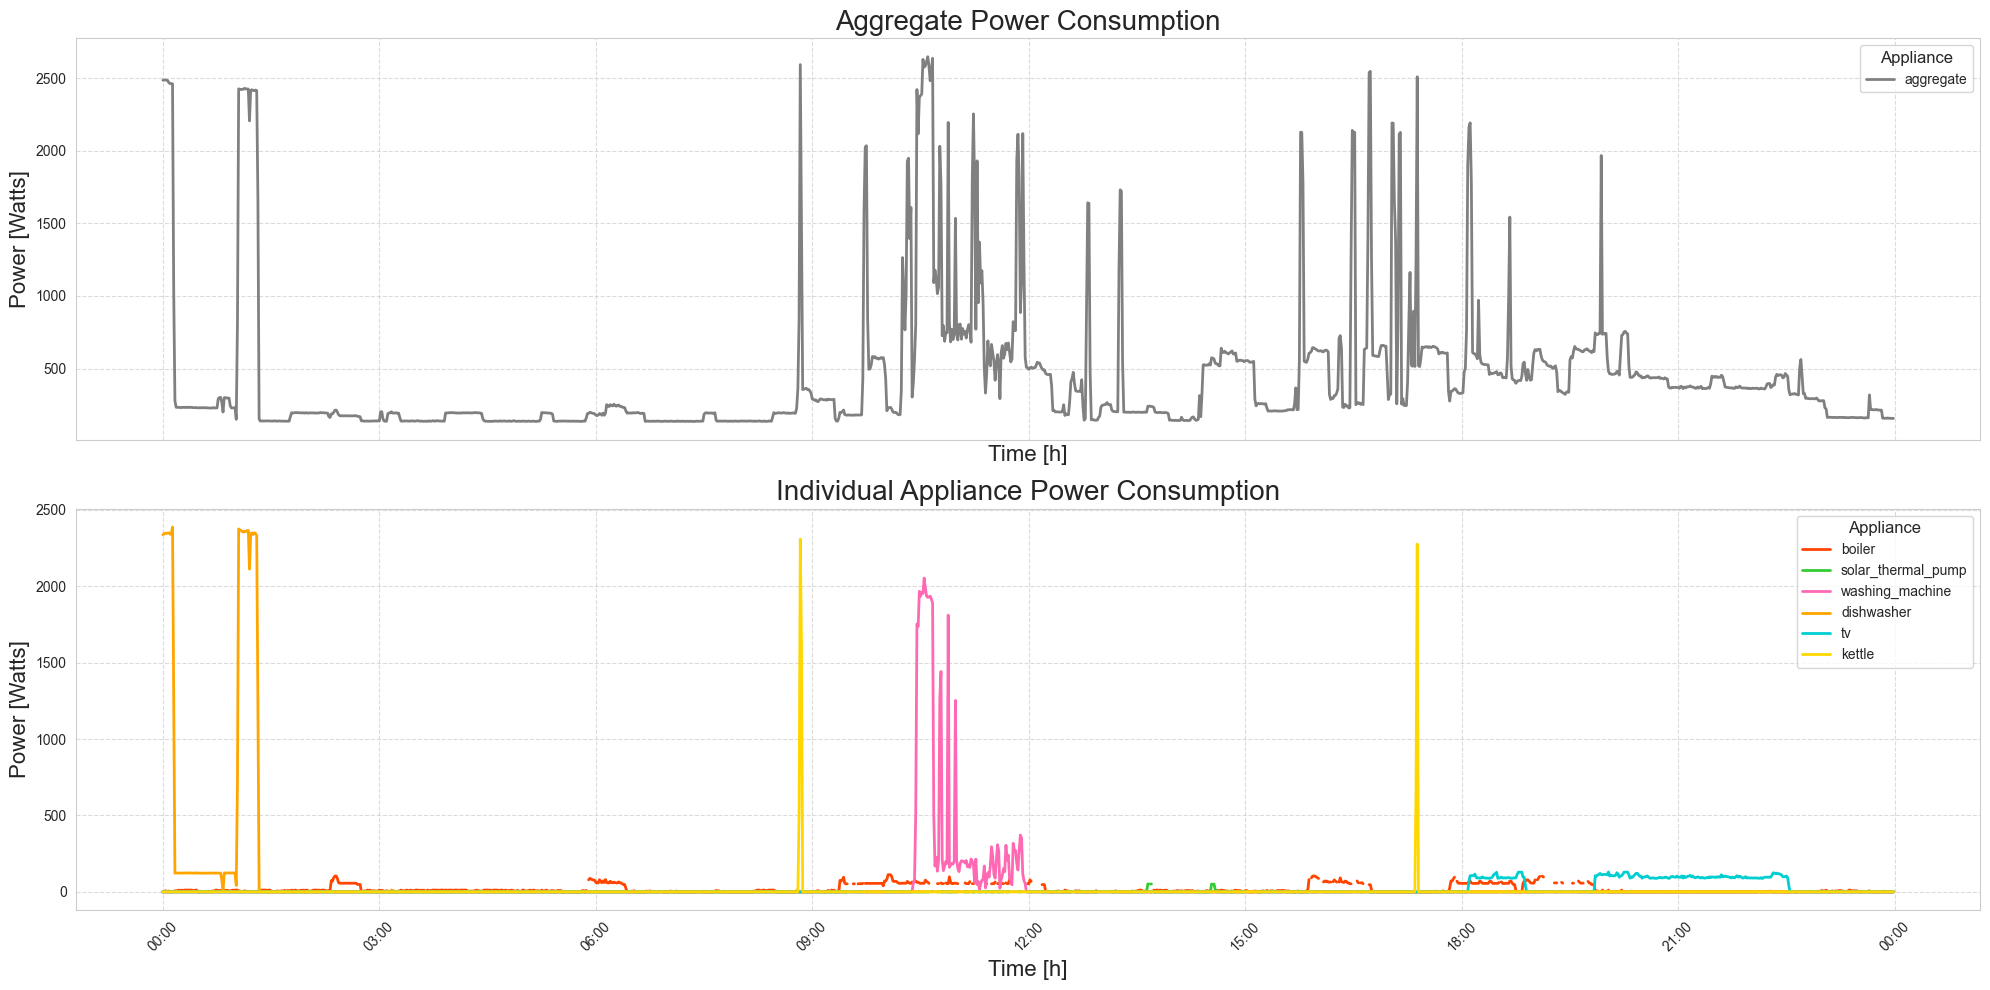

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a professional style
sns.set_style("whitegrid")

# Define a color palette for appliances
color_palette = {
    "aggregate": "#808080",  # Grey (neutral color for aggregate)
    "boiler": "#FF4500",     # Orange Red (warm color for heating-related appliance)
    "solar_thermal_pump": "#32CD32",  # Lime Green (eco-friendly, solar-related)
    "laptop": "#1E90FF",     # Dodger Blue (cool color for electronics)
    "washing_machine": "#FF69B4",  # Hot Pink (vibrant color for a common household appliance)
    "htpc": "#8A2BE2",       # Blue Violet (unique color for a media center)
    "dishwasher": "#FFA500", # Orange (bright and distinct)
    "kettle": "#FFD700",     # Gold (warm color for a kitchen appliance)
    "tv": "#00CED1",         # Dark Turquoise (cool color for entertainment devices)
}

# Plot power consumption for selected appliances
selected_appliances = ["aggregate", "boiler", "solar_thermal_pump", "laptop", "washing_machine", "htpc", "dishwasher", "kettle", "tv"]

# List of days to visualize (only one date)
days_to_visualize = ["2012-11-10"]  # Replace with the desired date

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(2, 1, figsize=(20, 10), sharex=True)

# Plot 1: Aggregate and Main Data
for file, data in appliance_resampled_labeled.items():
    if data["appliance"].iloc[0] == "aggregate":
        try:
            daily_data = data.loc[days_to_visualize[0]]
        except KeyError:
            print(f"No data available for {days_to_visualize[0]} in {file}. Skipping...")
            continue
        
        # Plot the aggregate data
        axes[0].plot(daily_data.index, daily_data["power"], 
                     label=data["appliance"].iloc[0], 
                     color=color_palette[data["appliance"].iloc[0]], 
                     linewidth=2)

# Add title and labels for the first subplot
axes[0].set_title("Aggregate Power Consumption", fontsize=20)
axes[0].set_ylabel("Power [Watts]", fontsize=16)
axes[0].set_xlabel("Time [h]", fontsize=16)
axes[0].grid(True, linestyle="--", alpha=0.7)
axes[0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%H:%M"))
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45)
axes[0].legend(title="Appliance", title_fontsize=12, fontsize=10)

# Plot 2: Individual Appliances
for file, data in appliance_resampled_labeled.items():
    if data["appliance"].iloc[0] in selected_appliances and data["appliance"].iloc[0] != "aggregate":
        try:
            daily_data = data.loc[days_to_visualize[0]]
        except KeyError:
            print(f"No data available for {days_to_visualize[0]} in {file}. Skipping...")
            continue
        
        # Plot the appliance data
        axes[1].plot(daily_data.index, daily_data["power"], 
                     label=data["appliance"].iloc[0], 
                     color=color_palette[data["appliance"].iloc[0]], 
                     linewidth=2)

# Add title and labels for the second subplot
axes[1].set_title("Individual Appliance Power Consumption", fontsize=20)
axes[1].set_ylabel("Power [Watts]", fontsize=16)
axes[1].set_xlabel("Time [h]", fontsize=16)
axes[1].grid(True, linestyle="--", alpha=0.7)
axes[1].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%H:%M"))
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45)
axes[1].legend(title="Appliance", title_fontsize=12, fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()

### 4. Identify Usage Patterns
Goal: Understand when appliances are most active and their typical usage durations.

Actions:

Group data by time of day (e.g., morning, afternoon, evening, night) and calculate average power consumption for each appliance.

Identify peak usage times for each appliance.

Example: Boiler might peak in the morning (for heating) and evening (for showers).

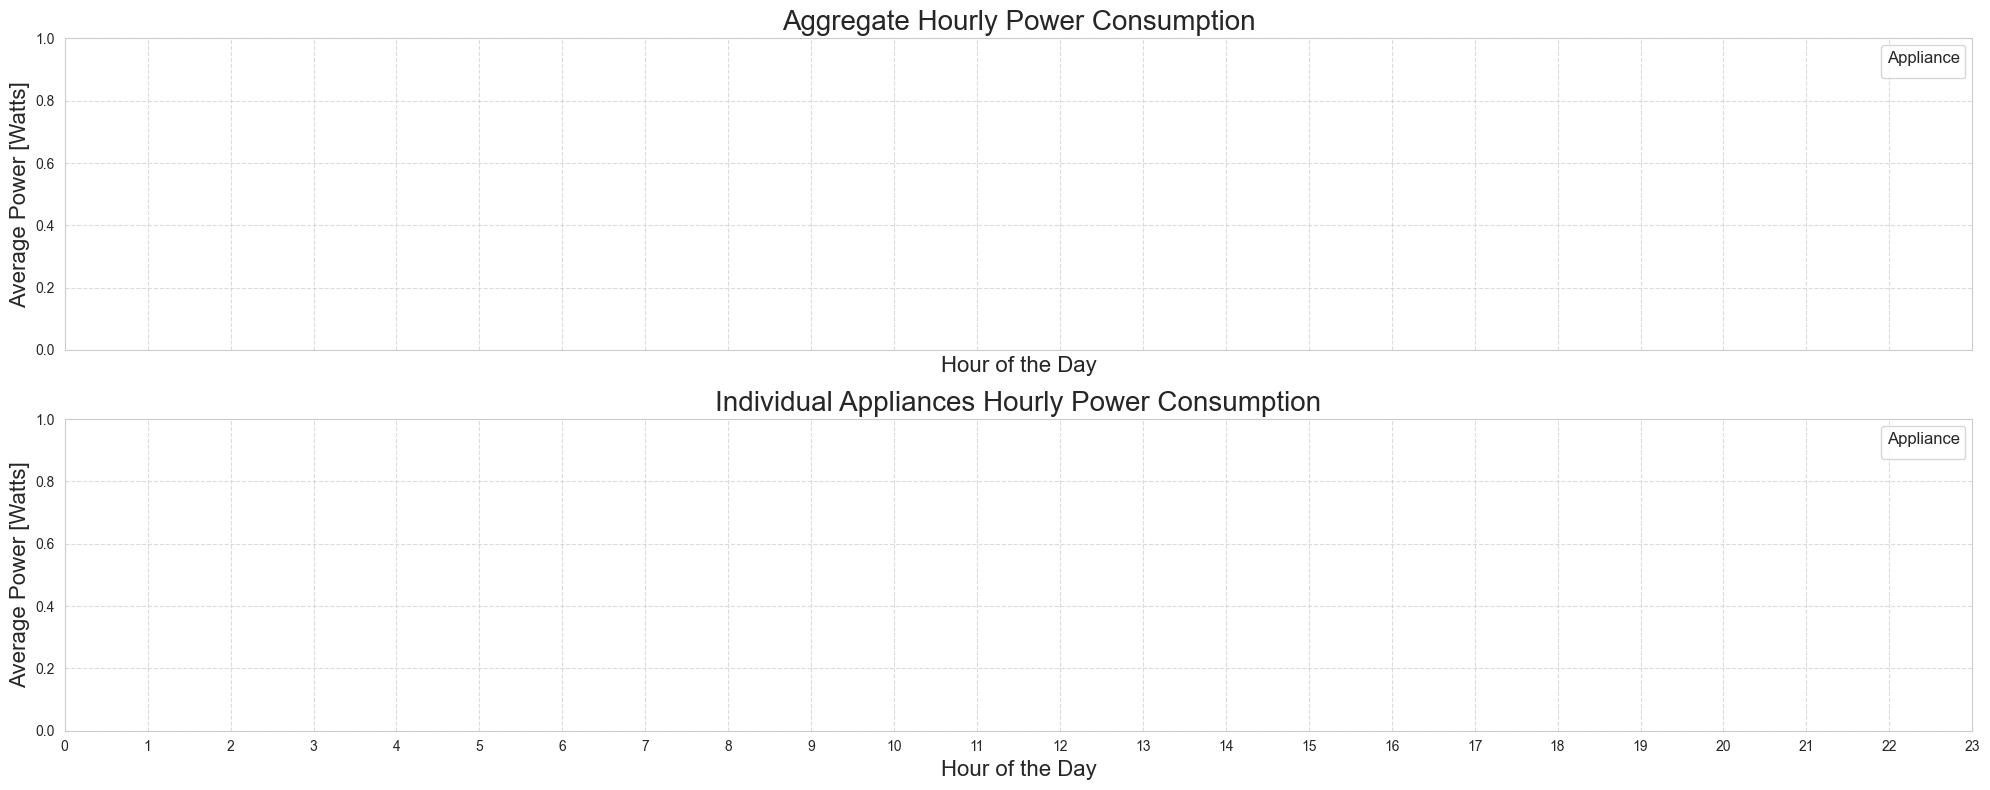

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a professional style
sns.set_style("whitegrid")

# Group data by hour of the day and calculate average power consumption
appliance_hourly = {}
for appliance, data in appliance_resampled_labeled.items():
    appliance_hourly[appliance] = data.groupby(data.index.hour)["power"].mean()

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(2, 1, figsize=(20, 10), sharex=True)

# Plot 1: Aggregate Hourly Power Consumption
if "aggregate" in appliance_hourly:
    axes[0].plot(appliance_hourly["aggregate"].index, appliance_hourly["aggregate"].values, 
                 label="Aggregate", color=color_palette["aggregate"], linewidth=2)

# Add title and labels for the first subplot
axes[0].set_title("Aggregate Hourly Power Consumption", fontsize=20)
axes[0].set_ylabel("Average Power [Watts]", fontsize=16)
axes[0].set_xlabel("Hour of the Day", fontsize=16)
axes[0].grid(True, linestyle="--", alpha=0.7)
axes[0].set_xticks(range(24))
axes[0].legend(title="Appliance", title_fontsize=12, fontsize=10)

# Plot 2: Individual Appliances Hourly Power Consumption
for appliance, hourly_data in appliance_hourly.items():
    if appliance != "aggregate" and appliance in color_palette:
        axes[1].plot(hourly_data.index, hourly_data.values, 
                     label=appliance, color=color_palette[appliance], linewidth=2)

# Add title and labels for the second subplot
axes[1].set_title("Individual Appliances Hourly Power Consumption", fontsize=20)
axes[1].set_ylabel("Average Power [Watts]", fontsize=16)
axes[1].set_xlabel("Hour of the Day", fontsize=16)
axes[1].grid(True, linestyle="--", alpha=0.7)
axes[1].set_xticks(range(24))
axes[1].legend(title="Appliance", title_fontsize=12, fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()

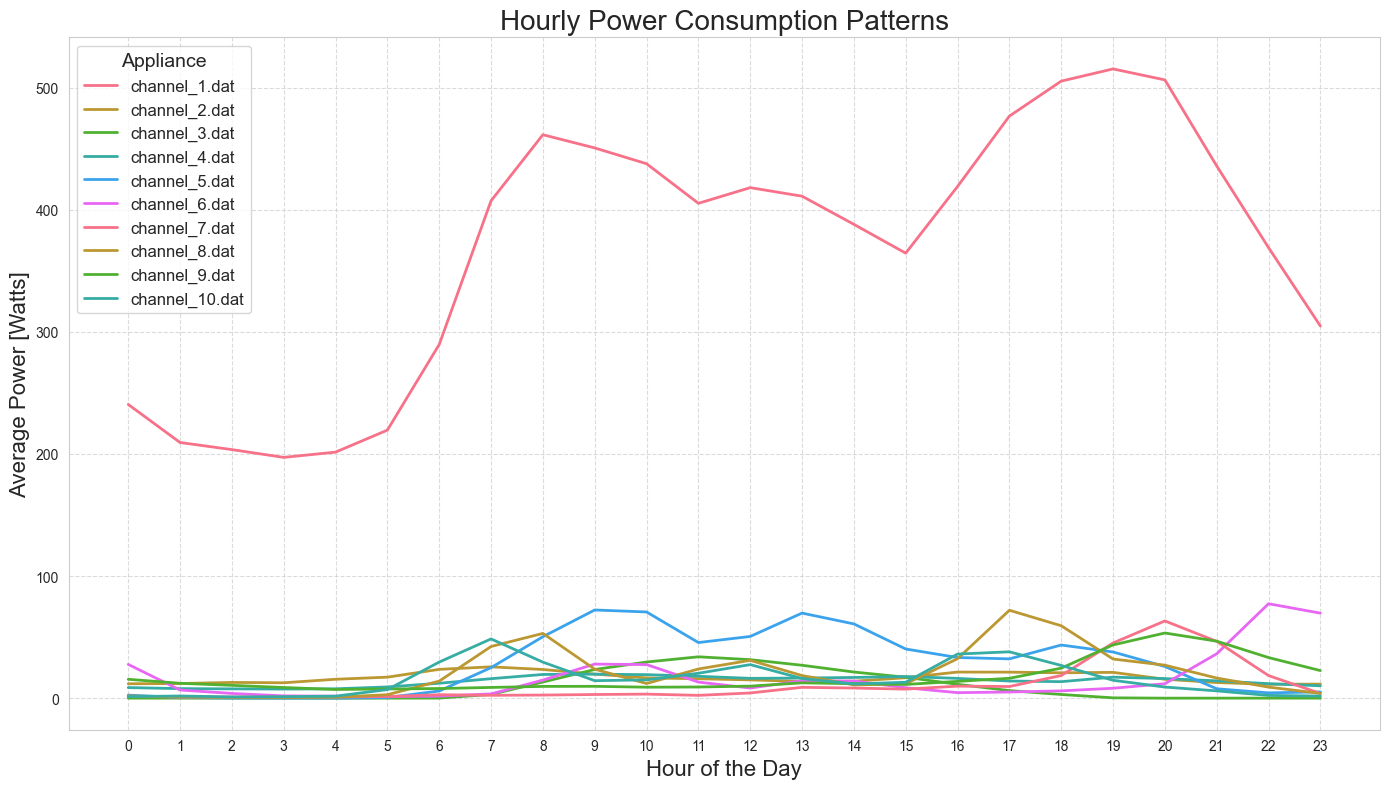

In [35]:
# Group data by hour of the day and calculate average power consumption
appliance_hourly = {}
for appliance, data in appliance_resampled_labeled.items():
    appliance_hourly[appliance] = data.groupby(data.index.hour)["power"].mean()

# Plot hourly usage patterns
plt.figure(figsize=(14, 8))
for appliance, hourly_data in appliance_hourly.items():
    plt.plot(hourly_data.index, hourly_data.values, label=appliance, linewidth=2)

plt.title("Hourly Power Consumption Patterns", fontsize=20)
plt.xlabel("Hour of the Day", fontsize=16)
plt.ylabel("Average Power [Watts]", fontsize=16)
plt.legend(title="Appliance", title_fontsize=14, fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks(range(24))
plt.tight_layout()
plt.show()

Appliance Hourly Keys: dict_keys(['aggregate', 'boiler', 'solar_thermal_pump', 'laptop', 'washing_machine', 'dishwasher', 'tv', 'kitchen_lights', 'htpc', 'kettle'])
aggregate:
timestamp
0    240.598981
1    209.405454
2    203.597595
3    197.221797
4    201.537093
Name: power, dtype: float64
boiler:
timestamp
0    11.784678
1    12.003622
2    12.891091
3    12.602378
4    15.483807
Name: power, dtype: float64
solar_thermal_pump:
timestamp
0    0.030023
1    0.023432
2    0.031311
3    0.003449
4    0.000000
Name: power, dtype: float64
laptop:
timestamp
0    8.669491
1    7.817835
2    7.624515
3    7.481238
4    7.667095
Name: power, dtype: float64
washing_machine:
timestamp
0    2.505201
1    0.565484
2    0.062914
3    0.007076
4    0.018242
Name: power, dtype: float64
dishwasher:
timestamp
0    27.677730
1     6.698212
2     3.855990
3     1.873486
4     1.623523
Name: power, dtype: float64
tv:
timestamp
0    1.571506
1    0.975640
2    0.973783
3    0.981647
4    0.972367
Name: p

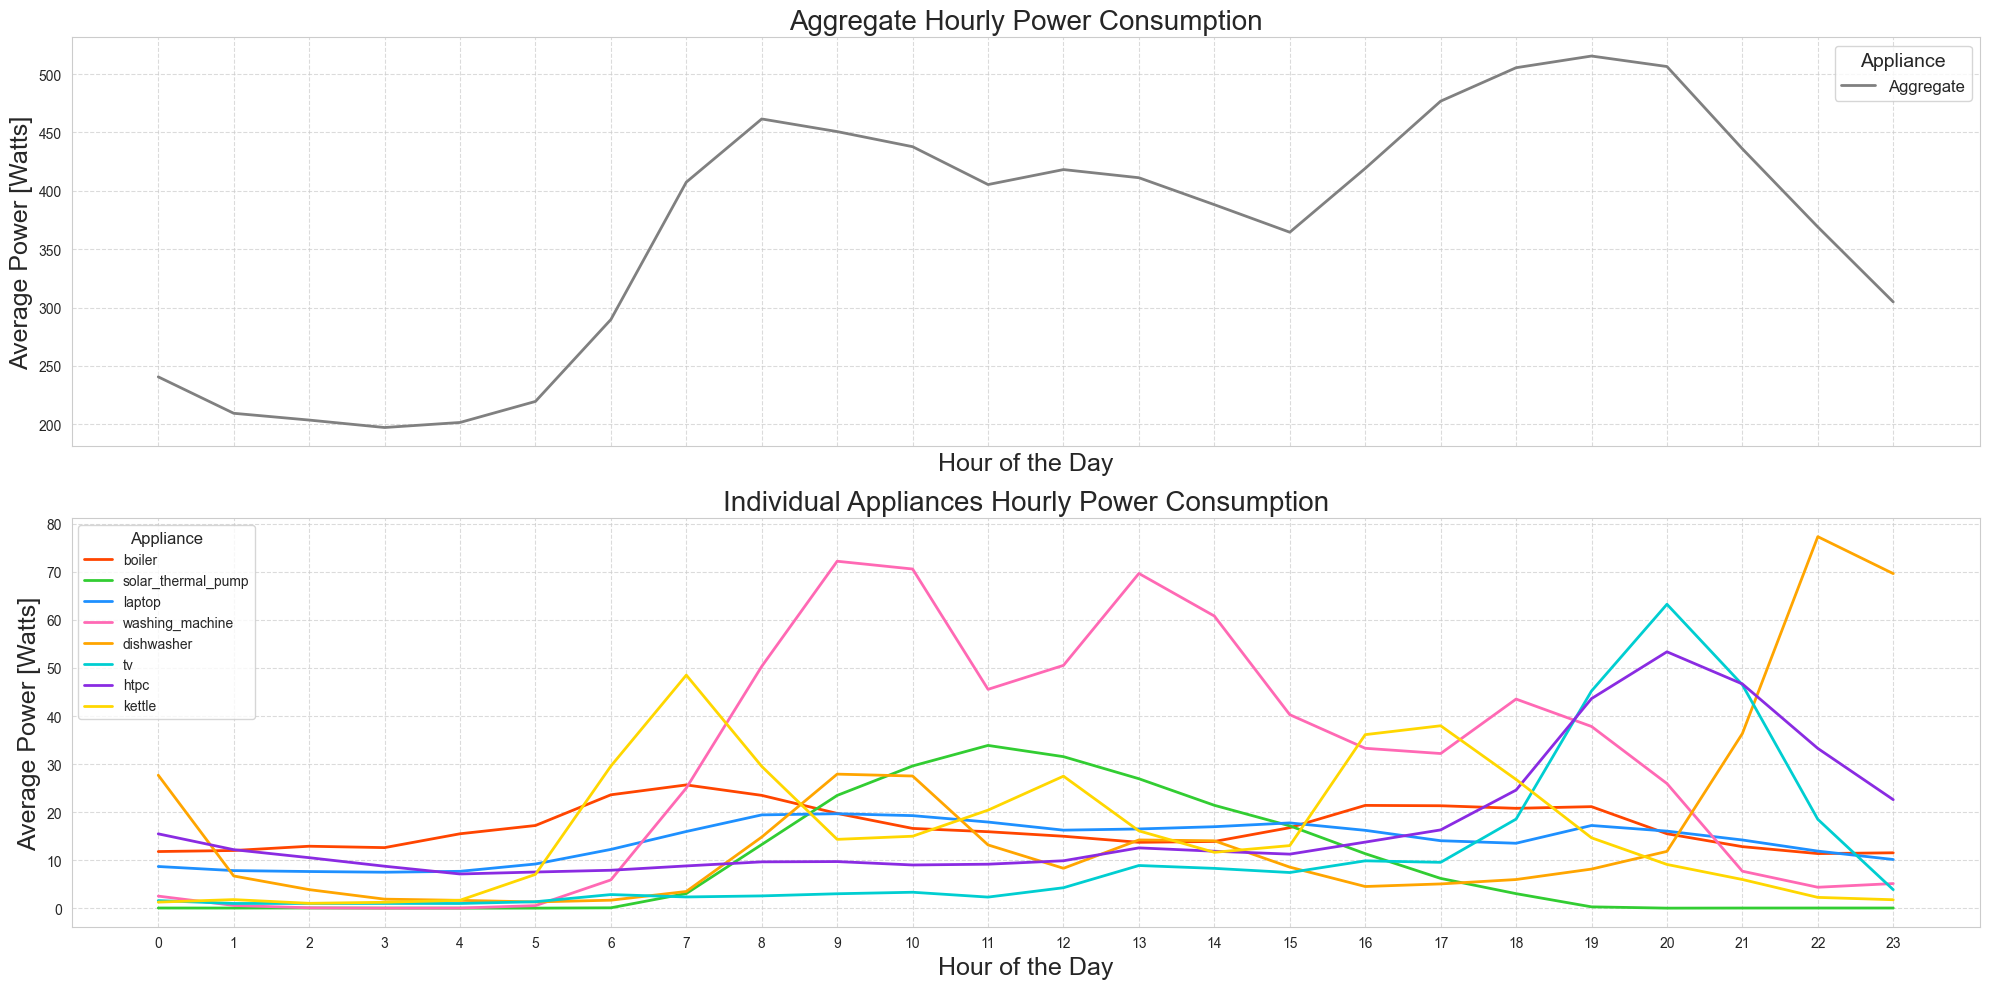

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a professional style
sns.set_style("whitegrid")

# Define a color palette for appliances
color_palette = {
    "aggregate": "#808080",  # Grey (neutral color for aggregate)
    "boiler": "#FF4500",     # Orange Red (warm color for heating-related appliance)
    "solar_thermal_pump": "#32CD32",  # Lime Green (eco-friendly, solar-related)
    "laptop": "#1E90FF",     # Dodger Blue (cool color for electronics)
    "washing_machine": "#FF69B4",  # Hot Pink (vibrant color for a common household appliance)
    "htpc": "#8A2BE2",       # Blue Violet (unique color for a media center)
    "dishwasher": "#FFA500", # Orange (bright and distinct)
    "kettle": "#FFD700",     # Gold (warm color for a kitchen appliance)
    "tv": "#00CED1",         # Dark Turquoise (cool color for entertainment devices)
}

# Map file names to appliance names using the labels DataFrame
file_to_appliance = dict(zip(labels["filename"], labels["appliance"]))

# Group data by hour of the day and calculate average power consumption
appliance_hourly = {}
for file, data in appliance_resampled_labeled.items():
    appliance_name = file_to_appliance[file]  # Get appliance name from file name
    appliance_hourly[appliance_name] = data.groupby(data.index.hour)["power"].mean()

# Debugging: Check appliance_hourly
print("Appliance Hourly Keys:", appliance_hourly.keys())
for appliance, hourly_data in appliance_hourly.items():
    print(f"{appliance}:")
    print(hourly_data.head())

# Create subplots: 2 rows, 1 column
fig, axes = plt.subplots(2, 1, figsize=(20, 10), sharex=True)

# Plot 1: Aggregate Hourly Power Consumption
if "aggregate" in appliance_hourly:
    axes[0].plot(appliance_hourly["aggregate"].index, appliance_hourly["aggregate"].values, 
                 label="Aggregate", color=color_palette["aggregate"], linewidth=2)

# Add title and labels for the first subplot
axes[0].set_title("Aggregate Hourly Power Consumption", fontsize=20)
axes[0].set_ylabel("Average Power [Watts]", fontsize=18)
axes[0].set_xlabel("Hour of the Day", fontsize=18)
axes[0].grid(True, linestyle="--", alpha=0.7)
axes[0].set_xticks(range(24))
axes[0].legend(title="Appliance", title_fontsize=14, fontsize=12)

# Plot 2: Individual Appliances Hourly Power Consumption
for appliance, hourly_data in appliance_hourly.items():
    if appliance != "aggregate" and appliance in color_palette:
        axes[1].plot(hourly_data.index, hourly_data.values, 
                     label=appliance, color=color_palette[appliance], linewidth=2)

# Add title and labels for the second subplot
axes[1].set_title("Individual Appliances Hourly Power Consumption", fontsize=20)
axes[1].set_ylabel("Average Power [Watts]", fontsize=18)
axes[1].set_xlabel("Hour of the Day", fontsize=18)
axes[1].grid(True, linestyle="--", alpha=0.7)
axes[1].set_xticks(range(24))
axes[1].legend(title="Appliance", title_fontsize=12, fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()

Peak Hours:

The aggregate plot likely shows peak hours (e.g., 6–10 AM and 6–10 PM), which align with typical household activity patterns.

The individual appliance plots help explain which appliances are driving these peaks.

Energy Efficiency Opportunities:

Appliances with high power consumption during off-peak hours (e.g., late-night dishwasher usage) might indicate opportunities for energy savings by shifting usage to off-peak times.

Anomalies:

If an appliance shows unexpected spikes or continuous high usage, it might indicate a malfunction or inefficient operation.

4. Recommendations:
Shift Usage:

Encourage the use of high-power appliances (e.g., washing machine, dishwasher) during off-peak hours to reduce energy costs and strain on the grid.

Upgrade Appliances:

Identify appliances with high energy consumption and consider upgrading to more energy-efficient models.

Behavioral Changes:

Educate users about peak hours and encourage energy-saving behaviors (e.g., turning off lights when not in use, reducing boiler usage during non-peak hours).

Example Insights from the Plot:
Aggregate Plot:

Peak at 7 AM: Likely due to morning routines (e.g., boiler, kettle, kitchen lights).

Peak at 7 PM: Likely due to evening activities (e.g., TV, washing machine, dishwasher).

Individual Appliance Plots:

Boiler: Peaks at 7 AM and 7 PM (morning and evening showers/heating).

Washing Machine: Spike at 12 PM (midday laundry).

TV: Peaks at 7 PM (evening entertainment).

In [40]:
# Group data by hour of the day and day of the week
appliance_daily_hourly = {}
for appliance, data in appliance_resampled_labeled.items():
    # Extract day of the week and hour of the day
    data["day_of_week"] = data.index.dayofweek  # Monday=0, Sunday=6
    data["hour_of_day"] = data.index.hour
    # Group by day of the week and hour of the day, then calculate mean power
    appliance_daily_hourly[appliance] = data.groupby(["day_of_week", "hour_of_day"])["power"].mean().unstack(level=0)

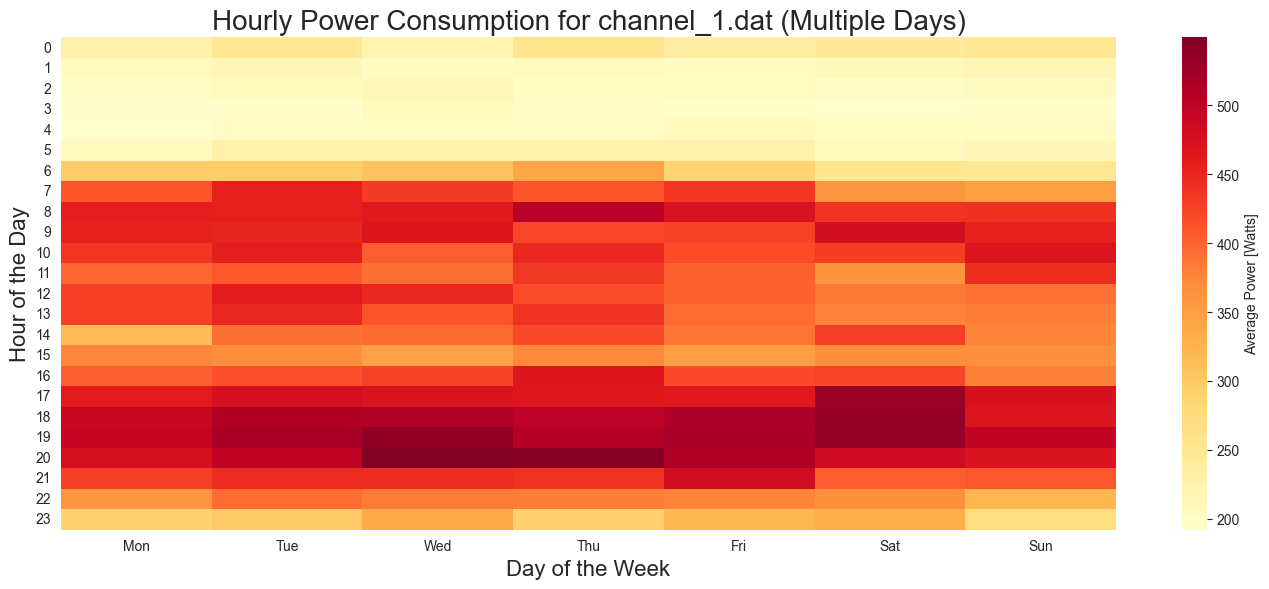

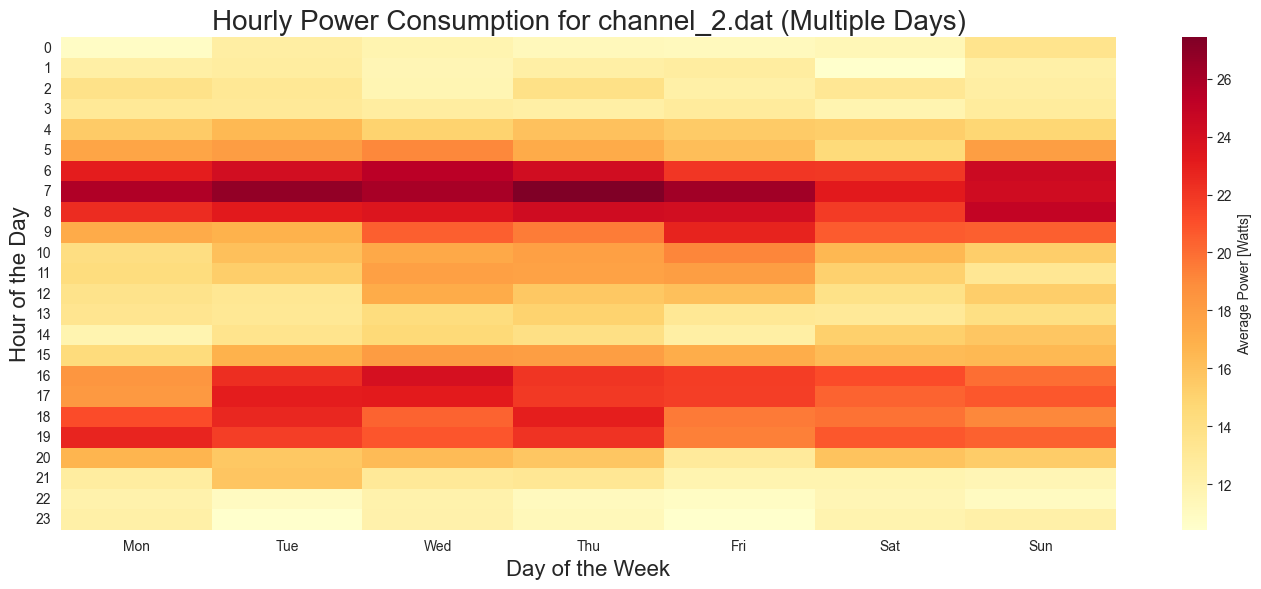

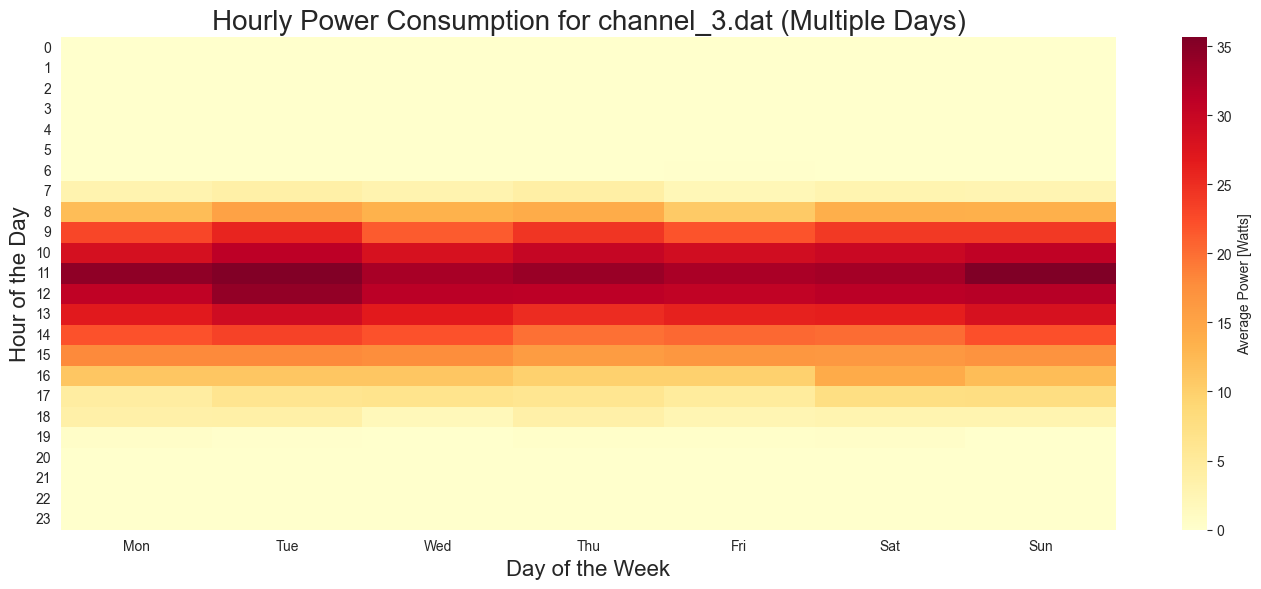

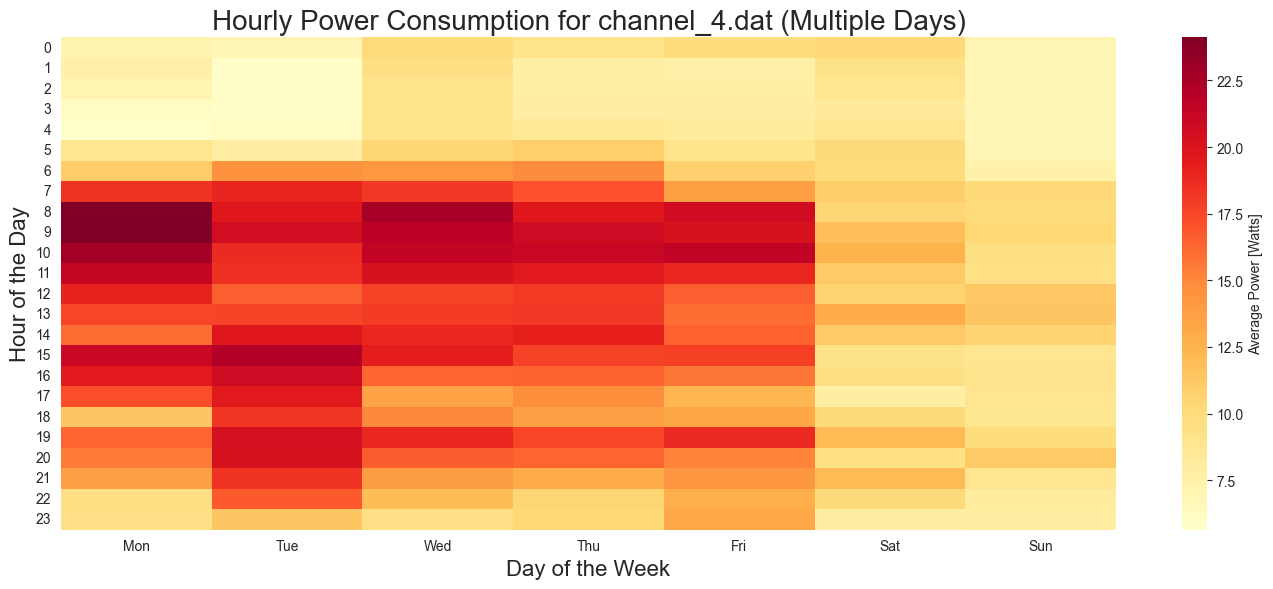

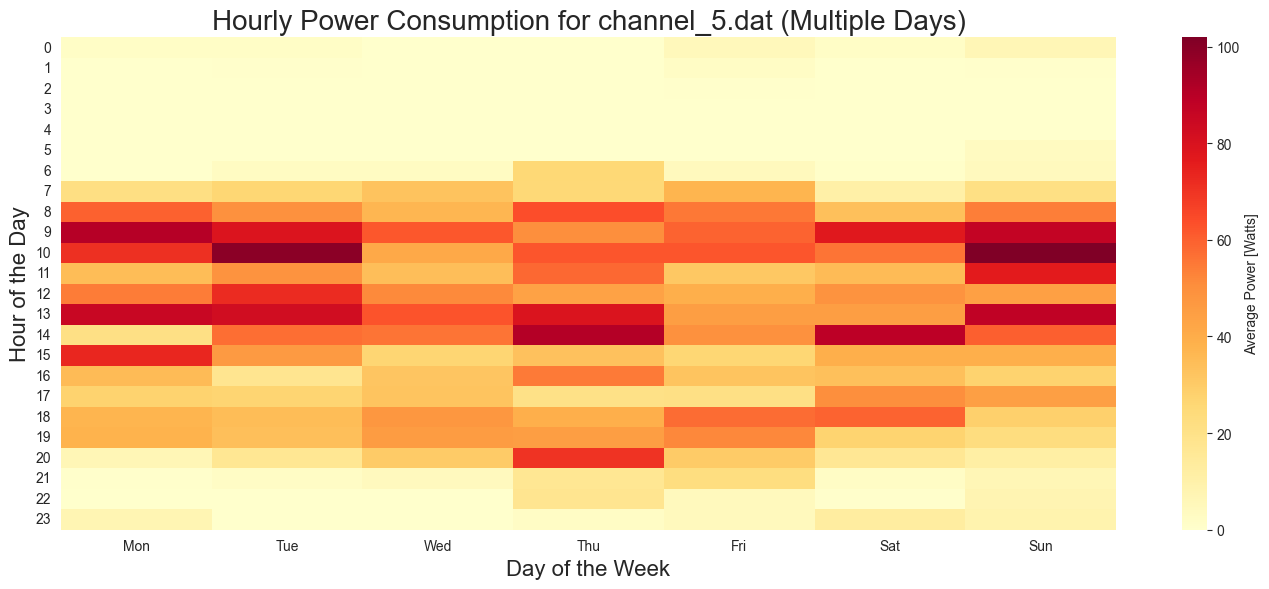

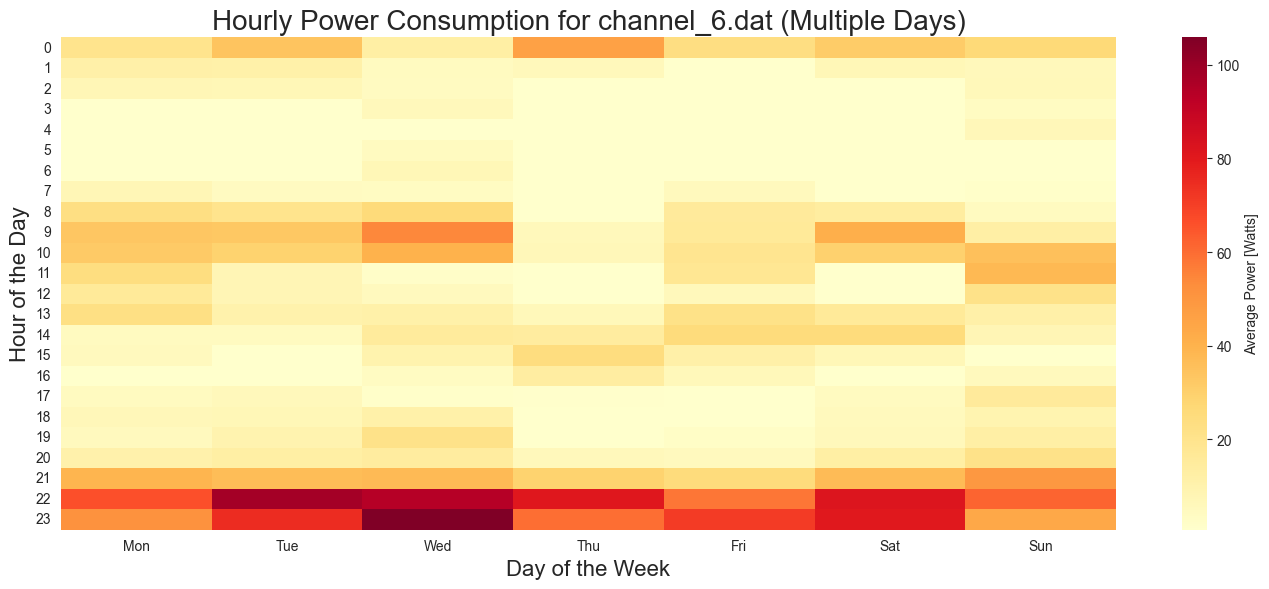

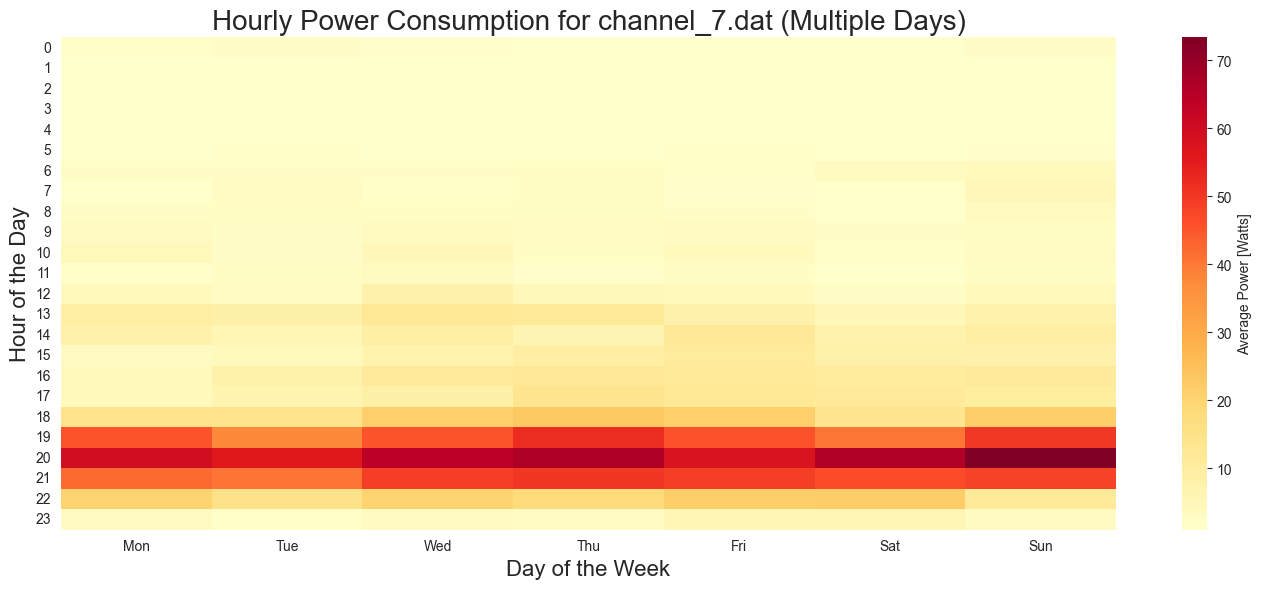

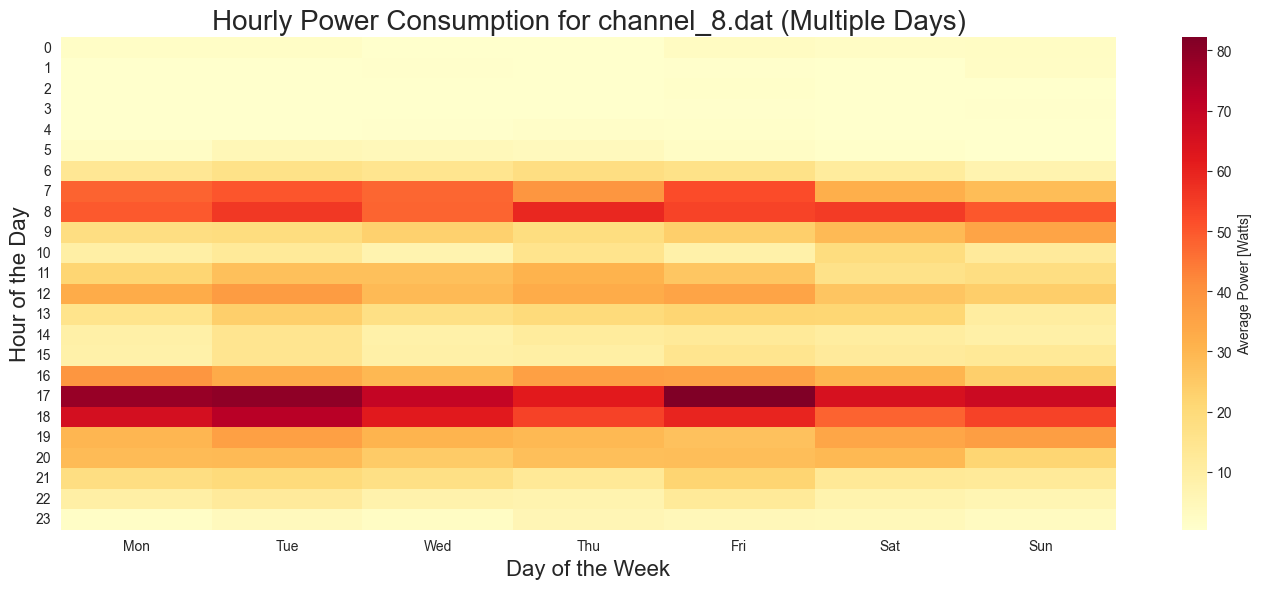

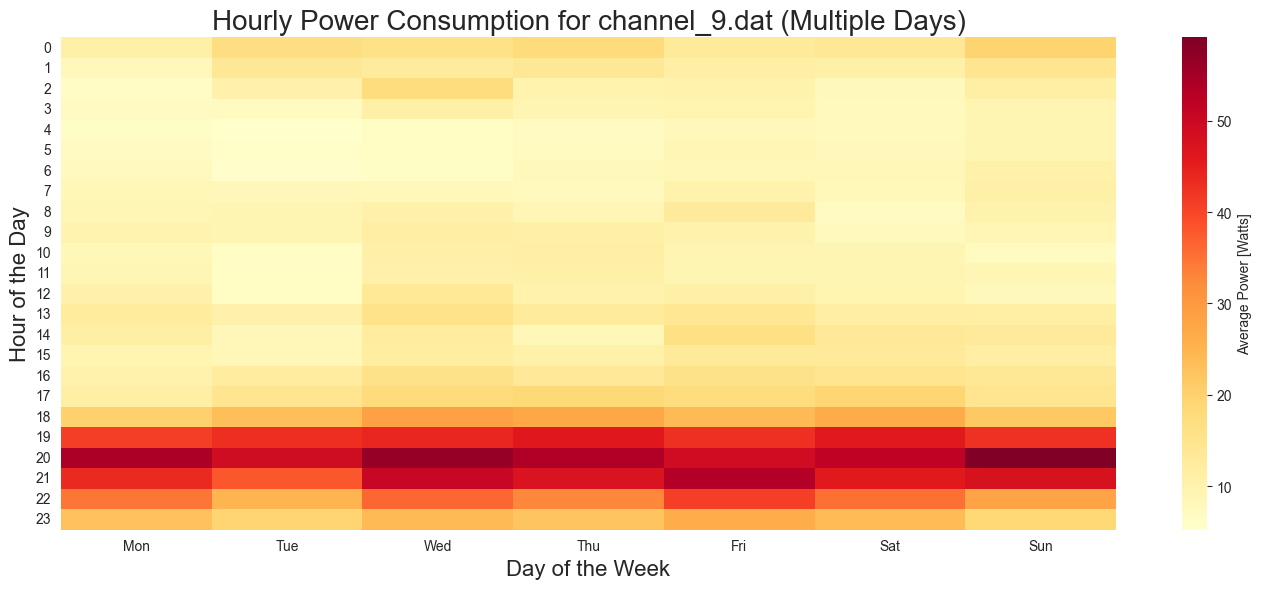

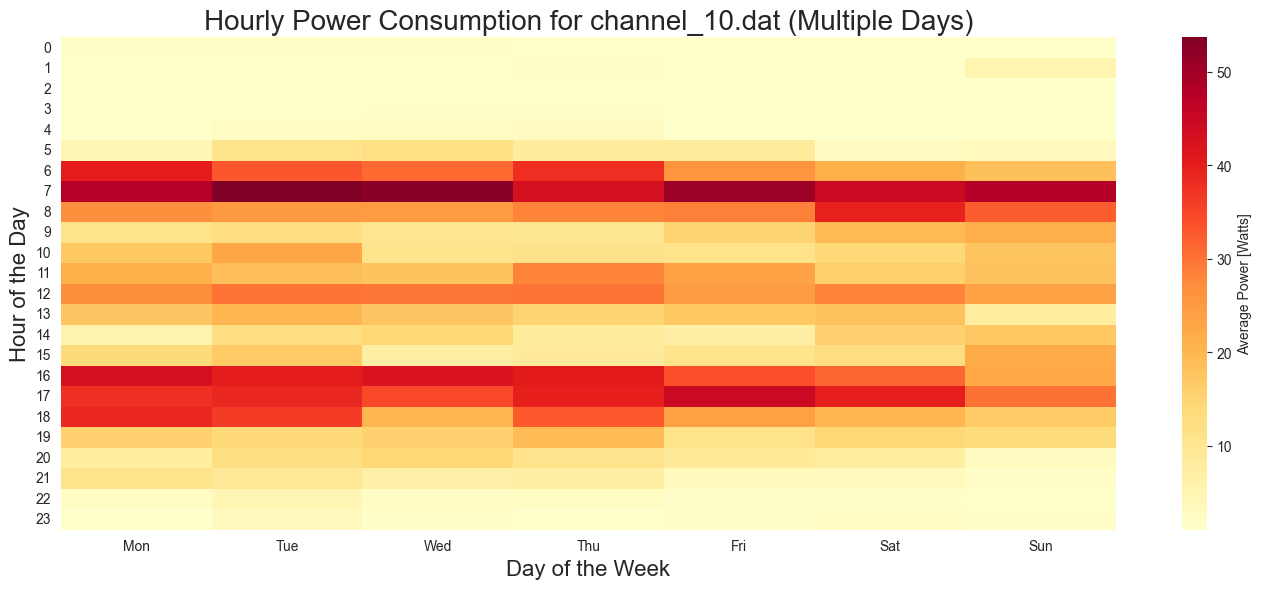

In [41]:
import numpy as np

# Plot heatmaps for each appliance
for appliance, daily_hourly_data in appliance_daily_hourly.items():
    plt.figure(figsize=(14, 6))
    sns.heatmap(daily_hourly_data, cmap="YlOrRd", annot=False, fmt=".1f", 
                cbar_kws={"label": "Average Power [Watts]"})
    
    # Add title and labels
    plt.title(f"Hourly Power Consumption for {appliance} (Multiple Days)", fontsize=20)
    plt.xlabel("Day of the Week", fontsize=16)
    plt.ylabel("Hour of the Day", fontsize=16)
    plt.xticks(np.arange(7) + 0.5, ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], rotation=0)
    plt.yticks(np.arange(24) + 0.5, range(24), rotation=0)
    plt.tight_layout()
    plt.show()

In [46]:
# Debugging: Check appliance_daily_hourly
print("Appliance Daily Hourly Keys:", appliance_daily_hourly.keys())
for appliance, daily_hourly_data in appliance_daily_hourly.items():
    print(f"{appliance}:")
    print(daily_hourly_data.head())

Appliance Daily Hourly Keys: dict_keys(['channel_1.dat', 'channel_2.dat', 'channel_3.dat', 'channel_4.dat', 'channel_5.dat', 'channel_6.dat', 'channel_7.dat', 'channel_8.dat', 'channel_9.dat', 'channel_10.dat'])
channel_1.dat:
day_of_week           0           1           2           3           4  \
hour_of_day                                                               
0            226.078741  251.597815  221.039262  255.660298  235.772383   
1            208.464273  214.872265  205.301449  206.620841  204.965348   
2            200.032360  206.149663  211.766095  201.544911  201.966697   
3            194.853110  195.330969  207.042448  198.480212  195.912808   
4            192.574359  202.333636  201.455620  203.032276  208.213979   

day_of_week           5           6  
hour_of_day                          
0            242.529292  251.019473  
1            210.132147  215.343104  
2            199.718690  204.186448  
3            192.132345  196.971713  
4            200.84

Appliance Daily Hourly Keys: dict_keys(['aggregate', 'boiler', 'solar_thermal_pump', 'laptop', 'washing_machine', 'dishwasher', 'tv', 'kitchen_lights', 'htpc', 'kettle'])
aggregate:
day_of_week           0           1           2           3           4  \
hour_of_day                                                               
0            226.078741  251.597815  221.039262  255.660298  235.772383   
1            208.464273  214.872265  205.301449  206.620841  204.965348   
2            200.032360  206.149663  211.766095  201.544911  201.966697   
3            194.853110  195.330969  207.042448  198.480212  195.912808   
4            192.574359  202.333636  201.455620  203.032276  208.213979   

day_of_week           5           6  
hour_of_day                          
0            242.529292  251.019473  
1            210.132147  215.343104  
2            199.718690  204.186448  
3            192.132345  196.971713  
4            200.845675  202.252779  
boiler:
day_of_week       

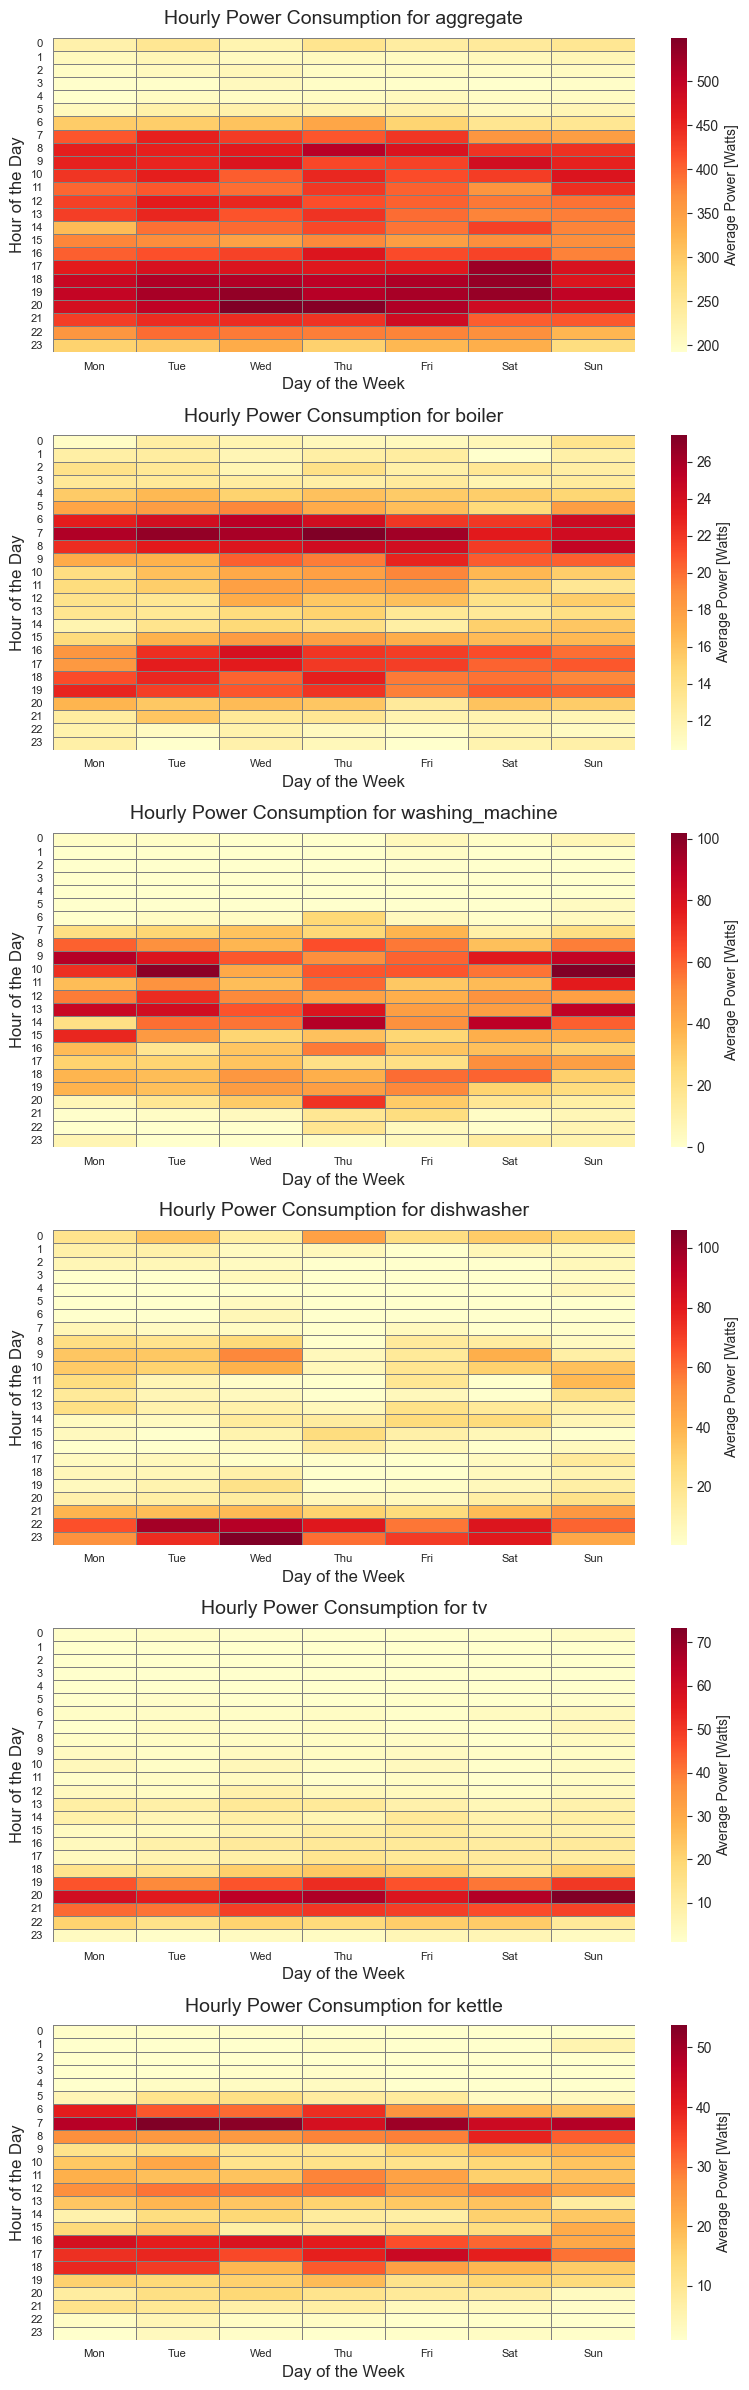

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set a professional style
sns.set_style("whitegrid")

# Define a color palette for appliances
color_palette = {
    "aggregate": "#808080",  # Grey (neutral color for aggregate)
    "boiler": "#FF4500",     # Orange Red (warm color for heating-related appliance)
    "solar_thermal_pump": "#32CD32",  # Lime Green (eco-friendly, solar-related)
    "laptop": "#1E90FF",     # Dodger Blue (cool color for electronics)
    "washing_machine": "#FF69B4",  # Hot Pink (vibrant color for a common household appliance)
    "htpc": "#8A2BE2",       # Blue Violet (unique color for a media center)
    "dishwasher": "#FFA500", # Orange (bright and distinct)
    "kettle": "#FFD700",     # Gold (warm color for a kitchen appliance)
    "tv": "#00CED1",         # Dark Turquoise (cool color for entertainment devices)
}

# Map file names to appliance names using the labels DataFrame
file_to_appliance = dict(zip(labels["filename"], labels["appliance"]))

# Group data by hour of the day and day of the week
appliance_daily_hourly = {}
for file, data in appliance_resampled_labeled.items():
    appliance_name = file_to_appliance[file]  # Get appliance name from file name
    # Extract day of the week and hour of the day
    data["day_of_week"] = data.index.dayofweek  # Monday=0, Sunday=6
    data["hour_of_day"] = data.index.hour
    # Group by day of the week and hour of the day, then calculate mean power
    appliance_daily_hourly[appliance_name] = data.groupby(["day_of_week", "hour_of_day"])["power"].mean().unstack(level=0)

# # Debugging: Check appliance_daily_hourly
# print("Appliance Daily Hourly Keys:", appliance_daily_hourly.keys())
# for appliance, daily_hourly_data in appliance_daily_hourly.items():
#     print(f"{appliance}:")
#     print(daily_hourly_data.head())

# Define the appliances to plot
appliances_to_plot = ["aggregate", "boiler", "washing_machine", "dishwasher", "tv", "kettle"]

# Create a figure with subplots
fig, axes = plt.subplots(len(appliances_to_plot), 1, figsize=(8, 4 * len(appliances_to_plot)))

# Define a professional color map
cmap = "YlOrRd"  # Yellow to Red color map

# Plot heatmaps for each appliance
for i, appliance in enumerate(appliances_to_plot):
    if appliance in appliance_daily_hourly:
        # Get the data for the current appliance
        daily_hourly_data = appliance_daily_hourly[appliance]
        
        # Ensure the data is in the correct format (24 hours x 7 days)
        if daily_hourly_data.shape != (24, 7):
            print(f"Data for {appliance} is not in the correct format (24x7). Reshaping...")
            new_index = range(24)  # Hours of the day
            new_columns = range(7)  # Days of the week
            daily_hourly_data = daily_hourly_data.reindex(index=new_index, columns=new_columns, fill_value=0)
        
        # Plot the heatmap
        sns.heatmap(daily_hourly_data, cmap=cmap, annot=False, fmt=".1f", 
                    cbar_kws={"label": "Average Power [Watts]"}, ax=axes[i], 
                    annot_kws={"size": 8}, linewidths=0.5, linecolor="gray")
        
        # Add title and labels
        axes[i].set_title(f"Hourly Power Consumption for {appliance}", fontsize=14, pad=10)
        axes[i].set_xlabel("Day of the Week", fontsize=12)
        axes[i].set_ylabel("Hour of the Day", fontsize=12)
        
        # Customize x and y ticks
        axes[i].set_xticks(np.arange(7) + 0.5)
        axes[i].set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], rotation=0, fontsize=8)
        axes[i].set_yticks(np.arange(24) + 0.5)
        axes[i].set_yticklabels(range(24), rotation=0, fontsize=8)

# Adjust layout
plt.tight_layout()

# Save the figure for publication
#plt.savefig("heatmaps.png", dpi=300, bbox_inches="tight")

# Show the figure
plt.show()